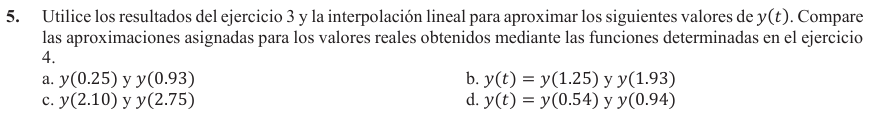

In [3]:
import numpy as np
import pandas as pd

# Método de Euler
def euler_method(f, t0, y0, h, t_end):
    steps = int((t_end - t0) / h) + 1
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(steps - 1):
        y += h * f(t, y)
        t += h
        t_values.append(t)
        y_values.append(y)
    return pd.DataFrame({"t": t_values, "y_aprox": y_values})

# Funciones del ejercicio 3
f_a = lambda t, y: (y / t) - (y / t)**2
f_b = lambda t, y: 1 + (y / t) + (y / t)**2
f_c = lambda t, y: -(y + 1)*(y + 3)
f_d = lambda t, y: -5*y + 5*t**2 + 2*t

# Aproximaciones con Euler
df_a = euler_method(f_a, t0=1, y0=1, h=0.1, t_end=2)
df_b = euler_method(f_b, t0=1, y0=0, h=0.2, t_end=3)
df_c = euler_method(f_c, t0=0, y0=-2, h=0.2, t_end=2)
df_d = euler_method(f_d, t0=0, y0=1/3, h=0.1, t_end=1)

# Interpolación lineal
def interpolar(df, t_eval):
    return np.interp(t_eval, df["t"], df["y_aprox"])

# Soluciones exactas del ejercicio 4
def exact_a(t): return t / (1 + np.log(t))
def exact_b(t): return t * np.tan(np.log(t))
def exact_c(t): return -3 + 2 / (1 + np.exp(-2 * t))
def exact_d(t): return t**2 + (1/3) * np.exp(-5 * t)

# Puntos a interpolar
puntos = {
    'a': [0.25, 0.93],
    'b': [1.25, 1.93],
    'c': [2.10, 2.75],
    'd': [0.54, 0.94]
}

# Asociación de incisos
casos = {
    'a': (df_c, exact_c),  # [0,2]
    'b': (df_a, exact_a),  # [1,2]
    'c': (df_b, exact_b),  # [1,3]
    'd': (df_d, exact_d),  # [0,1]
}

# Mostrar resultados
for letra in ['a', 'b', 'c', 'd']:
    df, f_exacta = casos[letra]
    print(f"\n--- Inciso {letra.upper()} ---")
    for t_eval in puntos[letra]:
        y_interp = interpolar(df, t_eval)
        y_real = f_exacta(t_eval)
        error = abs(y_interp - y_real)
        print(f"t = {t_eval:.2f} | y_interp = {y_interp:.6f} | y_real = {y_real:.6f} | error = {error:.6f}")



--- Inciso A ---
t = 0.25 | y_interp = -1.752000 | y_real = -1.755081 | error = 0.003081
t = 0.93 | y_interp = -1.235121 | y_real = -1.269406 | error = 0.034285

--- Inciso B ---
t = 1.25 | y_interp = 1.014977 | y_real = 1.021957 | error = 0.006980
t = 1.93 | y_interp = 1.153902 | y_real = 1.164390 | error = 0.010488

--- Inciso C ---
t = 2.10 | y_interp = 1.660756 | y_real = 1.924962 | error = 0.264206
t = 2.75 | y_interp = 3.526160 | y_real = 4.394170 | error = 0.868010

--- Inciso D ---
t = 0.54 | y_interp = 0.282833 | y_real = 0.314002 | error = 0.031169
t = 0.94 | y_interp = 0.866552 | y_real = 0.886632 | error = 0.020080
